In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
def import_data(filename, sheet_count):
    """
    function to import and concatenate excel data
    requires that exported data contains columns:
        index, test_time, step_time, voltage, current, capacity, scapacity, energy, senergy, and state
    """
    names = ['index', 'test_time', 'step_time', 'voltage', 'current', 'capacity', 'scapacity', 'energy', 'senergy', 'state']
    df = pd.read_excel(filename, sheet_name='Sheet1', header=None, names=names)
    dfl = list([df])
    if sheet_count == 1:
        pass
    else:
        for i in range(1, sheet_count):
            sheet_name='Sheet1(Continued{})'.format(i)
            df0 = pd.read_excel(filename, sheet_name, header=None, names=names)
            dfl.append(df0)
    dataframe = pd.concat(dfl, ignore_index=True)
    return dataframe

def test_import_data():
    """
    docstring
    """
    dataframe = import_data('example_data.xls', 2)
    assert isinstance(dataframe, pd.core.frame.DataFrame), 'output is not a pandas dataframe'
    assert len(dataframe) == 130571, 'output should have length 130571, not {}'.format(len(dataframe))
    assert len(dataframe.keys()) == 10, 'output should have 10 keys, not {}'.format(len(dataframe.keys()))

In [3]:
test_import_data()

In [4]:
dataframe = import_data('example_data.xls', 2)

In [5]:
# dataframe

In [6]:
def clean_prep_break(dataframe):
    """
    function that removes labels from in between cycles,
    adds a new column which contains the time in seconds,
    and outputs a list of cycle_breaks
    """
    times = dataframe['test_time']
    drop_labels = ['Mode', 'Rest', 'Charge CC', 'Charge C-Rate',
                   'Discharge CC', 'Discharge C-Rate', 'TestTime']
    drop_index = [i for i, time_0 in enumerate(times) if time_0 in drop_labels]
    index = [i for i, time_0 in enumerate(times) if time_0 not in drop_labels] 
    dataframe2 = dataframe.drop(drop_index)
    # add column with time converted to seconds
    t_sec = []
    step_t_sec = []
    times = dataframe2['test_time']
    step_times = dataframe2['step_time']
    for i in range(len(dataframe2['test_time'])):
        j = index[i]
        # first convert step time to seconds
        step_time_0 = str(step_times[j])
        hours, minutes, seconds = step_time_0.split(':')
        sec = int(hours)*3600 + int(minutes)*60 + int(seconds)
        step_t_sec.append(sec)
        # next convert overall time to seconds
        time_0 = str(times[j])
        if len(time_0) < 10:
            days = 0
            hours, minutes, seconds = time_0.split(':')
        else:
            days, time = time_0.split('-')
            hours, minutes, seconds = time.split(':')
        sec = int(days)*86400 + int(hours)*3600 + int(minutes)*60 + int(seconds)
        t_sec.append(sec)
    dataframe2['step_time_sec'] = step_t_sec
    dataframe2['test_time_sec'] = t_sec
    # converts drop_index to a list of cycle_breaks
    cycle_break = []
    for i in range(len(dataframe.index)):
        if i - 1 in drop_index and i + 1 in drop_index:
            cycle_break.append(i)
        else:
            pass
    return dataframe2, cycle_break

def test_clean_prep_break():
    """
    docstring
    """
    dataframe = import_data('example_data.xls', 2)
    clean_dataframe, cycle_break = clean_prep_break(dataframe)
    assert isinstance(dataframe2, pd.core.frame.DataFrame), 'output is not a pandas dataframe'
    assert isinstance(cycle_break, list), 'output is not a list'
    assert isinstance(cycle_break[0], int), 'list does not contain integer index values'
    assert len(cycle_break) == 75, 'cycle_break contains the incorrect number of breaks'

In [7]:
clean_dataframe, cycle_break = clean_prep_break(dataframe)

In [8]:
clean_dataframe

,index,test_time,step_time,voltage,current,capacity,scapacity,energy,senergy,state,step_time_sec,test_time_sec
3,1,00:00:00,00:00:00,2.346,0,0,0,0,0,R,0,0
4,2,00:10:00,00:10:00,2.3449,0,0,0,0,0,R,600,600
5,3,00:20:00,00:20:00,2.3449,0,0,0,0,0,R,1200,1200
6,4,00:30:00,00:30:00,2.3441,0,0,0,0,0,R,1800,1800
7,5,00:40:00,00:40:00,2.3445,0,0,0,0,0,R,2400,2400
8,6,00:50:00,00:50:00,2.3441,0,0,0,0,0,R,3000,3000
9,7,01:00:00,01:00:00,2.3445,0,0,0,0,0,R,3600,3600
10,8,01:10:00,01:10:00,2.3445,0,0,0,0,0,R,4200,4200
11,9,01:20:00,01:20:00,2.3434,0,0,0,0,0,R,4800,4800
12,10,01:30:00,01:30:00,2.3434,0,0,0,0,0,R,5400,5400


In [9]:
def return_cycle_list(clean_dataframe, cycle_break, rest=True, reverse=True):
    # first break up the indexes for each cycle
    # empty list to collect lists of step_indeces
    index_list = []
    for i in range(0, len(cycle_break)-1):
        step_indeces = np.arange(cycle_break[i]+2, cycle_break[i+1]-1)
        index_list.append(step_indeces)
    # add all values after the last cycle_break as the final cycle
    step_indeces = np.arange(cycle_break[-1], clean_dataframe.index[-1]+1)
    index_list.append(step_indeces)
    index_list
    # drop rest data if True
    if rest is True:
        index_list.pop(0)
        print('Rest step removed')
    else:
        pass
    # if reverse is True the first cycle will only have a discharge while all
    # others will have a charge followed by a discharge
    cycle_list = []
    if reverse is True:
        cycle_list.append([index_list[0]])
        # remove first discharge from index_list
        index_list.pop(0)
        print('Reverse Mode: First cycle contains only initial discharge')
        print('{} complete cycles after intial discharge'.format(len(index_list)//2))
    else:
        print('{} complete cycles'.format(len(index_list)//2))
    for i in range(0, len(index_list)-1, 2):
        cycle = [index_list[i], index_list[i+1]]
        cycle_list.append(cycle)
    # if true there are an odd number of index lists indicating a partial cycle
    if len(index_list) % 2 == 1:
        cycle_list.append([index_list[-1]])
        print('Final cycle only contains charge data')
    else:
        pass
    return cycle_list

In [10]:
cycle_list = return_cycle_list(clean_dataframe, cycle_break)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
36 complete cycles after intial discharge
Final cycle only contains charge data


## a wrapper function for dataprep

In [11]:
def plotprep(filename, sheet_count, rest=True, reverse=True):
    dataframe = import_data(filename, sheet_count)
    clean_dataframe, cycle_break = clean_prep_break(dataframe)
    cycle_list = return_cycle_list(clean_dataframe, cycle_break, rest, reverse)
    return clean_dataframe, cycle_list

In [12]:
clean_dataframe, cycle_list = plotprep('example_data.xls', 2)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
36 complete cycles after intial discharge
Final cycle only contains charge data


## create function that plots the C-V curve for the specified cycle

In [13]:
def cv_cycle_plot(ax, clean_dataframe, cycle_list, cycle_num, plot_color, plot_alpha, label=None):
    """
    docstring
    """
    # fetch indeces for specified cycle_num
    # check to see if complete cycle
    if len(cycle_list[cycle_num-1]) == 1:
        # check to see if initial discharge
        if cycle_num == 1:
            print('First cycle only contains discharge data')
            discharge_indeces = cycle_list[cycle_num-1][0]
            discharge_dataframe = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
            ax.plot(discharge_dataframe['capacity'],
                    discharge_dataframe['voltage'],
                    color=plot_color,
                    alpha=plot_alpha)
        else:
            print('Incomplete cycle, only contains charge data')
            charge_indeces = cycle_list[cycle_num-1][0]
            charge_dataframe = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
            ax.plot(charge_dataframe['capacity'],
                    charge_dataframe['voltage'],
                    color=plot_color,
                    alpha=plot_alpha)
    else:
        # complete cycle so plot both
        charge_indeces = cycle_list[cycle_num-1][0]
        charge_dataframe = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
        discharge_indeces = cycle_list[cycle_num-1][1]
        discharge_dataframe = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
        # now plot charge and discharge curves
        ax.plot(charge_dataframe['capacity'],
                charge_dataframe['voltage'],
                color=plot_color,
                alpha=plot_alpha)
        ax.plot(discharge_dataframe['capacity'],
                discharge_dataframe['voltage'],
                color=plot_color,
                alpha=plot_alpha)


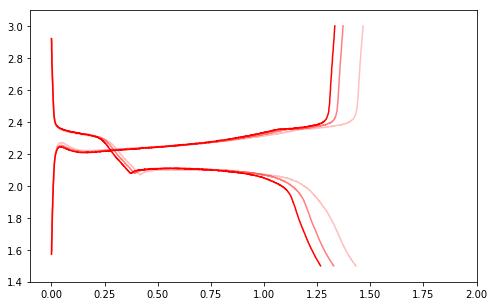

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim(-0.1, 2)
ax.set_ylim(1.4, 3.1)

cv_cycle_plot(ax, clean_dataframe, cycle_list, 5, 'red', .25)
cv_cycle_plot(ax, clean_dataframe, cycle_list, 10, 'red', .5)
cv_cycle_plot(ax, clean_dataframe, cycle_list, 15, 'red', 1)

## function that plots all cycles within a range with alpha fade on older cycles

In [15]:
def cv_plot(ax, clean_dataframe, cycle_list, input_list, plot_color):
    """
    docstring
    """
    # generate list of alpha values for fade effect
    if len(input_list) == 1:
        alpha_list = [1]
    elif len(input_list) == 2:
        alpha_list = [0.5, 1]
    else:
        alpha_list = np.linspace(0.25, 1, len(input_list))
    # iterate across input_list and plot each
    for i, cycle_num in enumerate(input_list):
        cv_cycle_plot(ax, clean_dataframe, cycle_list, cycle_num, plot_color,
                      alpha_list[i])

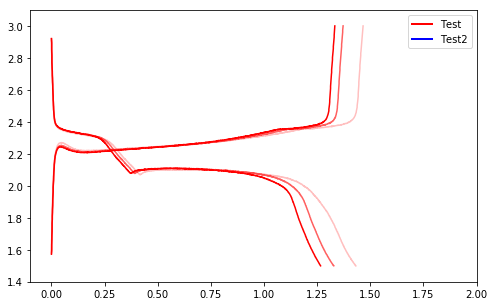

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim(-0.1, 2)
ax.set_ylim(1.4, 3.1)

plot_color = 'red'
input_list = [5, 10, 15]
label = 'Test Label'

cv_plot(ax, clean_dataframe, cycle_list, input_list, plot_color='red')


# snipet of code for adding a legend (easiest to not have it included
# in the functions and simply to add as needed)

custom_lines = [Line2D([0], [0], color=plot_color, lw=2),
               Line2D([0], [0], color='blue', lw=2)]
ax.legend(custom_lines, ['Test', 'Test2'])

## add a dQ/dV column
Q is equal to the current (I) times time (step_time). So dQ/dV is the slope of the Q vs V plot at each data point

In [17]:
test_df = clean_dataframe
# current = test_df['current']
# time = test_df['step_time_sec']
# Q = current*time
# test_df['Q'] = Q

In [165]:
# temporary function, not clean



cycle_num = 15
step = 5

def dqdv(test_df, cycle_list, cycle_num, step):
    """
    docstring
    """
    # extract cycle data
    charge_indeces = cycle_list[cycle_num-1][0]
    discharge_indeces = cycle_list[cycle_num-1][1]
    charge_df = test_df[test_df.index.isin(charge_indeces)]
    discharge_df = test_df[test_df.index.isin(discharge_indeces)]

    # clean data to remove any instances of duplicate voltages
    unique_df = charge_df.drop_duplicates(subset='voltage', keep='last', inplace=False)
    unique_df2 = discharge_df.drop_duplicates(subset='voltage', keep='last', inplace=False)

    # plot charge
    Q_values = list(unique_df['capacity'])
    V_values = list(unique_df['voltage'])
    # remove any row that has a lower voltage than previous
    Q_ordered = []
    V_ordered = []
    for i, element in enumerate(V_values):
        if i == 0:
            Q_ordered.append(Q_values[i])
            V_ordered.append(V_values[i])
        else:
            if element <= max(V_values[:i]):
                pass
            else:
                Q_ordered.append(Q_values[i])
                V_ordered.append(V_values[i])

    # calculate dQ/dV
    dQ_dV = []
    voltages = []
    step = 5
    for i in range(0, len(Q_ordered), step):
        if i == 0:
            dQ_dV.append(0)
            voltages.append(V_ordered[i])
        else:
            dQ = Q_ordered[i] - Q_ordered[i-step]
            dV = V_ordered[i] - V_ordered[i-step]
            value = dQ/dV
            dQ_dV.append(value)
            voltages.append(V_ordered[i])

    # plot discharge
    Q_values2 = list(unique_df2['capacity'])
    V_values2 = list(unique_df2['voltage'])
    # remove any row that has a lower voltage than previous
    Q_ordered2 = []
    V_ordered2 = []
    for i, element in enumerate(V_values2):
        if i == 0:
            Q_ordered2.append(Q_values2[i])
            V_ordered2.append(V_values2[i])
        else:
            if element >= min(V_values2[:i]):
                pass
            else:
                Q_ordered2.append(Q_values2[i])
                V_ordered2.append(V_values2[i])

    # calculate dQ/dV
    dQ_dV2 = []
    voltages2 = []
    for i in range(0, len(Q_ordered2), step):
        if i == 0:
            dQ_dV.append(0)
            voltages.append(V_ordered2[i])
        else:
            dQ = Q_ordered2[i] - Q_ordered2[i-step]
            dV = V_ordered2[i] - V_ordered2[i-step]
            value = dQ/dV
            dQ_dV2.append(value)
            voltages2.append(V_ordered2[i])
    
    return voltages, voltages2, dQ_dV, dQ_dV2

In [166]:
voltages, voltages2, dQ_dV, dQ_dV2 = dqdv(test_df, cycle_list, 10, 5)

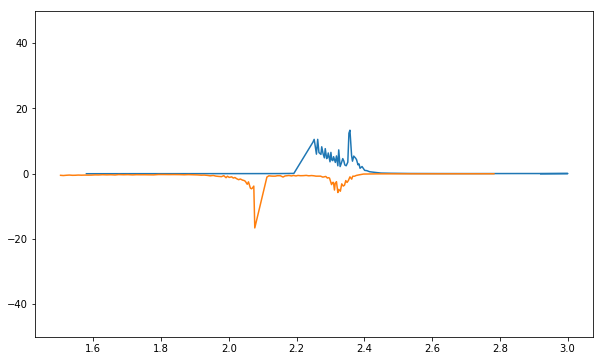

In [167]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim(-50,50)
ax.plot(voltages, dQ_dV)
ax.plot(voltages2, dQ_dV2)

## This give overall poor results. I'm instead going to try and interpolate the Q vs V plot to see if that gives a smoother curve

In [100]:
cycle_num = 15

# extract cycle data
charge_indeces = cycle_list[cycle_num-1][0]
discharge_indeces = cycle_list[cycle_num-1][1]
charge_df = test_df[test_df.index.isin(charge_indeces)]
discharge_df = test_df[test_df.index.isin(discharge_indeces)]

charge_q = list(charge_df['capacity'])
charge_v = list(charge_df['voltage'])
discharge_q = list(discharge_df['capacity'])
discharge_v = list(discharge_df['voltage'])

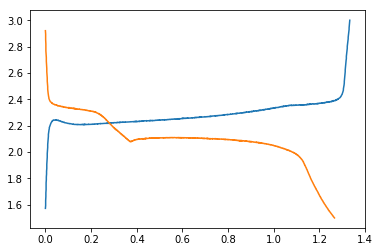

In [170]:
plt.plot(charge_q, charge_v)
plt.plot(discharge_q, discharge_v)

In [184]:
count = 5000

# interpolate q over this curve
v_points = np.linspace(min(charge_v), max(charge_v), count)
q_points = np.interp(v_points, charge_v, charge_q)

# interpolate q over this curve
v_points2 = np.linspace(min(discharge_v), max(discharge_v), count)
q_points2 = np.flip(np.interp(np.flip(v_points2), np.flip(discharge_v), np.flip(discharge_q)))

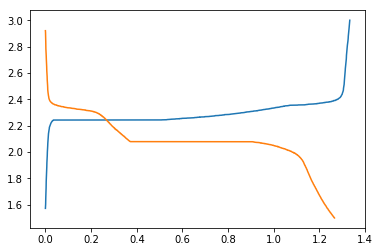

In [185]:
plt.plot(q_points, v_points)
plt.plot(q_points2, v_points2)

In [198]:
step = 100

# calculate charge dQ/dV
dQ_dV = []
voltages = []
for i in range(0, len(q_points)-step):
    if i <= step/2:
        dQ_dV.append(0)
        voltages.append(v_points[i])
    else:
        dQ = q_points[i+int(step/2)] - q_points[i-int(step/2)]
        dV = v_points[i+int(step/2)] - v_points[i-int(step/2)]
        value = dQ/dV
        dQ_dV.append(value)
        voltages.append(v_points[i])
for i in range(len(q_points)-step, len(q_points)):
        dQ_dV.append(0)
        voltages.append(v_points[i])
        
# calculate discharge dQ/dV
dQ_dV2 = []
voltages2 = []
for i in range(0, len(q_points2)-step):
    if i <= step/2:
        dQ_dV2.append(0)
        voltages2.append(v_points[i])
    else:
        dQ = q_points2[i+int(step/2)] - q_points2[i-int(step/2)]
        dV = v_points2[i+int(step/2)] - v_points2[i-int(step/2)]
        value = dQ/dV
        dQ_dV2.append(value)
        voltages2.append(v_points2[i])
for i in range(len(q_points2)-step, len(q_points2)):
        dQ_dV2.append(0)
        voltages2.append(v_points2[i])

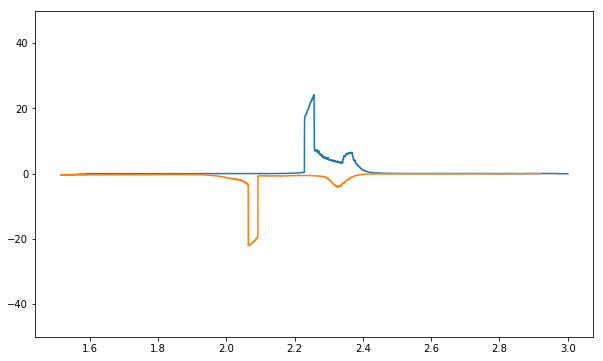

In [199]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim(-50,50)
ax.plot(voltages, dQ_dV)
ax.plot(voltages2, dQ_dV2)

In [202]:
# ok now as a plotting function for a single loop

def dqdv_cycle_plot(ax, clean_dataframe, cycle_list, cycle_num, count, step, plot_color):
    """
    docstring
    """
    # extract cycle data
    charge_indeces = cycle_list[cycle_num-1][0]
    discharge_indeces = cycle_list[cycle_num-1][1]
    charge_df = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
    discharge_df = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
    # extract Q and V values
    charge_q = list(charge_df['capacity'])
    charge_v = list(charge_df['voltage'])
    discharge_q = list(discharge_df['capacity'])
    discharge_v = list(discharge_df['voltage'])
    # interpolate q over charge curve
    v_points = np.linspace(min(charge_v), max(charge_v), count)
    q_points = np.interp(v_points, charge_v, charge_q)
    # interpolate q over discharge curve
    v_points2 = np.linspace(min(discharge_v), max(discharge_v), count)
    q_points2 = np.flip(np.interp(np.flip(v_points2), np.flip(discharge_v), np.flip(discharge_q)))
    # calculate charge dQ/dV
    dQ_dV = []
    voltages = []
    for i in range(0, len(q_points)-step):
        if i <= step/2:
            dQ_dV.append(0)
            voltages.append(v_points[i])
        else:
            dQ = q_points[i+int(step/2)] - q_points[i-int(step/2)]
            dV = v_points[i+int(step/2)] - v_points[i-int(step/2)]
            value = dQ/dV
            dQ_dV.append(value)
            voltages.append(v_points[i])
    for i in range(len(q_points)-step, len(q_points)):
            dQ_dV.append(0)
            voltages.append(v_points[i])
    # calculate discharge dQ/dV
    dQ_dV2 = []
    voltages2 = []
    for i in range(0, len(q_points2)-step):
        if i <= step/2:
            dQ_dV2.append(0)
            voltages2.append(v_points[i])
        else:
            dQ = q_points2[i+int(step/2)] - q_points2[i-int(step/2)]
            dV = v_points2[i+int(step/2)] - v_points2[i-int(step/2)]
            value = dQ/dV
            dQ_dV2.append(value)
            voltages2.append(v_points2[i])
    for i in range(len(q_points2)-step, len(q_points2)):
            dQ_dV2.append(0)
            voltages2.append(v_points2[i])
    # plot charge and discharge onto axis
    ax.plot(voltages, dQ_dV, color=plot_color)
    ax.plot(voltages2, dQ_dV2, color=plot_color)

## now a function for plotting the charge and discharge capacity

In [206]:
clean_dataframe

,index,test_time,step_time,voltage,current,capacity,scapacity,energy,senergy,state,step_time_sec,test_time_sec
3,1,00:00:00,00:00:00,2.346,0,0,0,0,0,R,0,0
4,2,00:10:00,00:10:00,2.3449,0,0,0,0,0,R,600,600
5,3,00:20:00,00:20:00,2.3449,0,0,0,0,0,R,1200,1200
6,4,00:30:00,00:30:00,2.3441,0,0,0,0,0,R,1800,1800
7,5,00:40:00,00:40:00,2.3445,0,0,0,0,0,R,2400,2400
8,6,00:50:00,00:50:00,2.3441,0,0,0,0,0,R,3000,3000
9,7,01:00:00,01:00:00,2.3445,0,0,0,0,0,R,3600,3600
10,8,01:10:00,01:10:00,2.3445,0,0,0,0,0,R,4200,4200
11,9,01:20:00,01:20:00,2.3434,0,0,0,0,0,R,4800,4800
12,10,01:30:00,01:30:00,2.3434,0,0,0,0,0,R,5400,5400


In [273]:

charge_caps = []
discharge_caps = []
for i, indeces in enumerate(cycle_list):
    if i == 0 and len(indeces) == 1:
        # first cycle only contains initial discharge
        discharge_indeces = cycle_list[i][0]
        discharge_df = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
        charge_caps.append(None)
        discharge_caps.append(max(list(discharge_df['scapacity'])))
    elif i != 0 and len(indeces) == 1:
        # last cycle only contains charge
        charge_indeces = cycle_list[i][0]
        charge_df = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
        charge_caps.append(max(list(charge_df['scapacity'])))
        dischage_caps.append(None)
    else:
        # all normal cycles with both charge and discharge
        charge_indeces = cycle_list[i][0]
        discharge_indeces = cycle_list[i][1]
        charge_df = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
        discharge_df = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
        charge_caps.append(max(list(charge_df['scapacity'])))
        discharge_caps.append(max(list(discharge_df['scapacity'])))

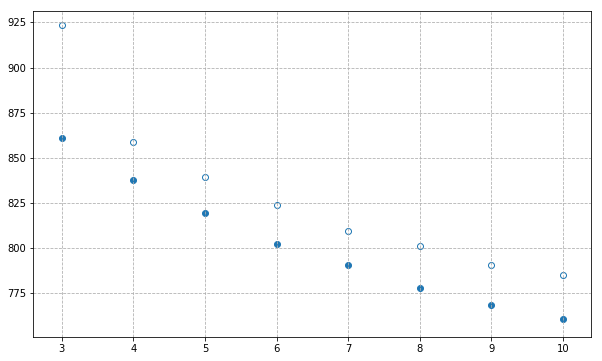

In [296]:
fig, ax = plt.subplots(figsize=(10,6))
ax.grid(which='major', axis='both', linestyle='--')
plot_color = 'C0'
cycle_range=(3,10)
if cycle_range == None:
    start = 0
    stop = len(cycle_list)
else:
    start = cycle_range[0]-1
    stop = cycle_range[1]

plt.scatter(np.linspace(1, len(charge_caps), len(charge_caps))[start:stop],
            charge_caps[start:stop],
            color='white',
            edgecolors=plot_color)
plt.scatter(np.linspace(1, len(discharge_caps), len(discharge_caps))[start:stop],
            discharge_caps[start:stop],
            color=plot_color)

In [303]:
def scap_plot(ax, clean_dataframe, cycle_list, plot_color, plot='all', cycle_range=None):
    """
    docstring
    """
    # first extract specific capacity data
    charge_caps = []
    discharge_caps = []
    for i, indeces in enumerate(cycle_list):
        if i == 0 and len(indeces) == 1:
            # first cycle only contains initial discharge
            discharge_indeces = cycle_list[i][0]
            discharge_df = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
            charge_caps.append(None)
            discharge_caps.append(max(list(discharge_df['scapacity'])))
        elif i != 0 and len(indeces) == 1:
            # last cycle only contains charge
            charge_indeces = cycle_list[i][0]
            charge_df = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
            charge_caps.append(max(list(charge_df['scapacity'])))
            dischage_caps.append(None)
        else:
            # all normal cycles with both charge and discharge
            charge_indeces = cycle_list[i][0]
            discharge_indeces = cycle_list[i][1]
            charge_df = clean_dataframe[clean_dataframe.index.isin(charge_indeces)]
            discharge_df = clean_dataframe[clean_dataframe.index.isin(discharge_indeces)]
            charge_caps.append(max(list(charge_df['scapacity'])))
            discharge_caps.append(max(list(discharge_df['scapacity'])))
    # second establish plotting range
    if cycle_range == None:
        start = 0
        stop = len(cycle_list)
    else:
        start = cycle_range[0]-1
        stop = cycle_range[1]
    # last plot the data
    if plot in {'all', 'charge'}:
        plt.scatter(np.linspace(1, len(charge_caps), len(charge_caps))[start:stop],
            charge_caps[start:stop],
            color='white',
            edgecolors=plot_color)
    if plot in {'all', 'discharge'}:
        plt.scatter(np.linspace(1, len(discharge_caps), len(discharge_caps))[start:stop],
            discharge_caps[start:stop],
            color=plot_color)


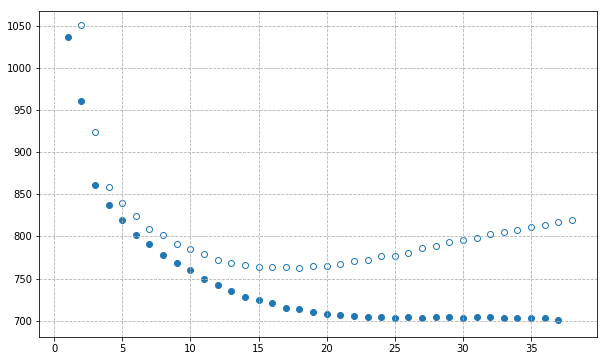

In [302]:
fig, ax = plt.subplots(figsize=(10,6))
ax.grid(which='major', axis='both', linestyle='--')

scap_plot(ax, clean_dataframe, cycle_list, plot_color='C0')

In [292]:
foo = [1,2,3,4,5,6,7,8,9,10]

In [293]:
foo[1:10]

[2, 3, 4, 5, 6, 7, 8, 9, 10]